<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
# Load Dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
# Create Validation Set
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

This is a 'Coat'


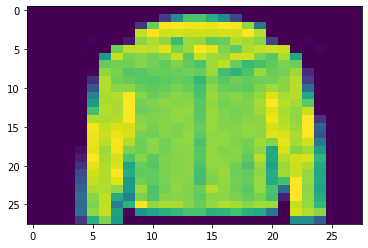

In [4]:
# Visualize Dataset
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

idx = 0
print(f"This is a '{class_names[y_train[idx]]}'")
plt.imshow(X_train[idx], aspect="auto")

In [5]:
# Create Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4548 - accuracy: 0.8396 - val_loss: 0.4438 - val_accuracy: 0.8428
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4238 - accuracy: 0.8511 - val_loss: 0.3971 - val_accuracy: 0.8634
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4002 - accuracy: 0.8585 - val_loss: 0.3871 - val_accuracy: 0.8682
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3839 - accuracy: 0.8635 - val_loss: 0.3770 - val_accuracy: 0.8700
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3712 - accuracy: 0.8682 - val_loss: 0.3862 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3584 - accuracy: 0.8737 - val_loss: 0.3580 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8769 - val_loss: 0.3491 - val_accuracy:

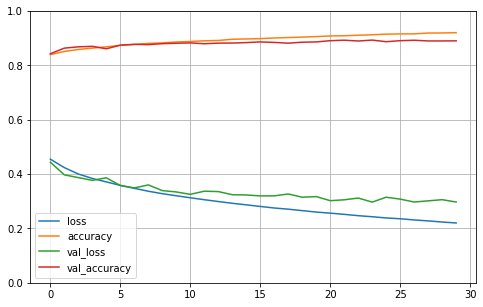

In [12]:
# Visualize training
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.9972 - accuracy: 0.8492


[63.997161865234375, 0.8492000102996826]